In [26]:
import requests
import pandas as pd
import datetime as dt
import praw

In [27]:
reddit = praw.Reddit(client_id = 's46cB0O1CjDLeg',
                    client_secret = 'OnU58KhDJdZzqgdpaDLfsSQ723PG9w',
                    password = '?xkk5^H,Q_ZaF+m',
                    user_agent = 'Personal use for keyword analysis.',
                    username = 'crownds18')

In [28]:
subreddit = reddit.subreddit('Wallstreetbets')

In [29]:
wsb_subreddit = subreddit.top()

In [30]:
wsb_subreddit = subreddit.top(limit=100000)

In [31]:
for submission in subreddit.top(limit=100000):
    print(submission.title, submission.id)

Times Square right now l8rf4k
UPVOTE so everyone sees we got SUPPORT l6wu59
GME YOLO update — Jan 28 2021 l78uct
GME YOLO month-end update — Jan 2021 l846a1
It’s treason then l881ia
CLASS ACTION AGAINST ROBINHOOD. Allowing people to only sell is the definition of market manipulation. A class action must be started, Robinhood has made plenty of money off selling info about our trades to the hedge funds to be able to pay out a little for causing people to loose money now l6x130
GME YOLO update — Feb 19 2021 lnqgz8
GME YOLO update — Jan 27 2021 --------------------------------------- guess i need 102 characters in title now l6ekdz
GME YOLO update — Feb 1 2021 lae6j0
Used some of my GME tendies to buy Nintendo Switches from Gamestop, then donated them to a Children's Hospital. Got featured on the local news and brought glory to WSB. l8c0u4
IT'S POWER TO THE TRADERS NOW l7feld
Wow super bowl commercial for us lexy8t
Can we all take a moment and appreciate the Mods who have grinded through t

In [32]:
topics_headers = { "title":[],
                "created": [], 
                "body":[]}

In [33]:
for submission in wsb_subreddit:
    topics_headers["title"].append(submission.title)
    topics_headers["created"].append(submission.created)
    topics_headers["body"].append(submission.selftext)

In [34]:
wsb_data = pd.DataFrame(topics_headers)

In [66]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [67]:
wsb_datetime = wsb_data["created"].apply(get_date)

In [68]:
wallstreetbets_data = wsb_data.assign(timestamp = wsb_datetime)

In [69]:
wallstreetbets_data

,title,created,body,timestamp
0,Times Square right now,1.612058e+09,,2021-01-30 18:00:38
1,UPVOTE so everyone sees we got SUPPORT,1.611870e+09,,2021-01-28 13:40:34
2,GME YOLO update — Jan 28 2021,1.611897e+09,,2021-01-28 21:06:23
3,GME YOLO month-end update — Jan 2021,1.611983e+09,,2021-01-29 21:04:45
4,It’s treason then,1.611992e+09,,2021-01-29 23:40:59
...,...,...,...,...
964,"My SURGEON Is On WSB, And Basically Just Calle...",1.602556e+09,"So, I come in today for a consultation about g...",2020-10-12 19:21:26
965,"Me, a long time lurker who suddenly YOLO’d on ...",1.614776e+09,,2021-03-03 04:48:24
966,Jokes on them. Red is my favorite color,1.612222e+09,,2021-02-01 15:32:12
967,All of Reddit is holding with us! Thank you to...,1.612265e+09,,2021-02-02 03:15:38


In [70]:
wallstreetbets_data.set_index("timestamp")

,title,created,body
timestamp,,,
2021-01-30 18:00:38,Times Square right now,1.612058e+09,
2021-01-28 13:40:34,UPVOTE so everyone sees we got SUPPORT,1.611870e+09,
2021-01-28 21:06:23,GME YOLO update — Jan 28 2021,1.611897e+09,
2021-01-29 21:04:45,GME YOLO month-end update — Jan 2021,1.611983e+09,
2021-01-29 23:40:59,It’s treason then,1.611992e+09,
...,...,...,...
2020-10-12 19:21:26,"My SURGEON Is On WSB, And Basically Just Calle...",1.602556e+09,"So, I come in today for a consultation about g..."
2021-03-03 04:48:24,"Me, a long time lurker who suddenly YOLO’d on ...",1.614776e+09,
2021-02-01 15:32:12,Jokes on them. Red is my favorite color,1.612222e+09,


In [73]:

wallstreetbets_data['timestamp'] = pd.to_datetime(wallstreetbets_data['timestamp'], utc=True)

wallstreetbets_data.set_index('timestamp', inplace=True)

#wallstreetbets_data.index = wallstreetbets_data.index.date
#wallstreetbets_data.index = wallstreetbets_data.index.date

KeyError: 'timestamp'

In [77]:
#wallstreetbets_data.index.dtype
wallstreetbets_data.index = wallstreetbets_data.index.date


In [78]:
wallstreetbets_data

,title,created,body
2021-01-30,Times Square right now,1.612058e+09,
2021-01-28,UPVOTE so everyone sees we got SUPPORT,1.611870e+09,
2021-01-28,GME YOLO update — Jan 28 2021,1.611897e+09,
2021-01-29,GME YOLO month-end update — Jan 2021,1.611983e+09,
2021-01-29,It’s treason then,1.611992e+09,
...,...,...,...
2020-10-12,"My SURGEON Is On WSB, And Basically Just Calle...",1.602556e+09,"So, I come in today for a consultation about g..."
2021-03-03,"Me, a long time lurker who suddenly YOLO’d on ...",1.614776e+09,
2021-02-01,Jokes on them. Red is my favorite color,1.612222e+09,
2021-02-02,All of Reddit is holding with us! Thank you to...,1.612265e+09,


In [84]:
wallstreetbets_data.drop(columns = ['created', 'body'], inplace = True)
wallstreetbets_data

,title
2021-01-30,Times Square right now
2021-01-28,UPVOTE so everyone sees we got SUPPORT
2021-01-28,GME YOLO update — Jan 28 2021
2021-01-29,GME YOLO month-end update — Jan 2021
2021-01-29,It’s treason then
...,...
2020-10-12,"My SURGEON Is On WSB, And Basically Just Calle..."
2021-03-03,"Me, a long time lurker who suddenly YOLO’d on ..."
2021-02-01,Jokes on them. Red is my favorite color
2021-02-02,All of Reddit is holding with us! Thank you to...


In [18]:
wallstreetbets_data.to_csv('WallStreetBets.csv', index=False)

In [87]:
mylist = ['GME', 'GameStop', 'AMC']
pattern = '|'.join(mylist)

pattern
'GME | GameStop | AMC'

wallstreetbets_data['mentions'] = wallstreetbets_data.title.str.contains(pattern)
wallstreetbets_data
#print(dft.groupby('UID')['TRUTH'].sum().astype(int))
#wallstreetbets_data.(pattern)


,title,mentions
2021-01-30,Times Square right now,False
2021-01-28,UPVOTE so everyone sees we got SUPPORT,False
2021-01-28,GME YOLO update — Jan 28 2021,True
2021-01-29,GME YOLO month-end update — Jan 2021,True
2021-01-29,It’s treason then,False
...,...,...
2020-10-12,"My SURGEON Is On WSB, And Basically Just Calle...",False
2021-03-03,"Me, a long time lurker who suddenly YOLO’d on ...",True
2021-02-01,Jokes on them. Red is my favorite color,False
2021-02-02,All of Reddit is holding with us! Thank you to...,False


In [93]:
wallstreetbets_mentions = wallstreetbets_data.groupby(wallstreetbets_data.index)['mentions'].sum()
wallstreetbets_mentions

2017-01-31    0
2018-02-08    0
2018-03-14    0
2018-04-17    0
2018-06-03    0
             ..
2021-06-01    1
2021-06-02    1
2021-06-03    1
2021-06-04    1
2021-06-05    0
Name: mentions, Length: 221, dtype: int64

In [97]:
wallstreetbets_mentions.to_frame()

,mentions
2017-01-31,0
2018-02-08,0
2018-03-14,0
2018-04-17,0
2018-06-03,0
...,...
2021-06-01,1
2021-06-02,1
2021-06-03,1
2021-06-04,1


In [121]:
wallstreetbets_mentions.index.isnull().sum()

0

In [123]:
wallstreetbets_mentions_plot = wallstreetbets_mentions
wallstreetbets_mentions_plot.index = pd.to_datetime(wallstreetbets_mentions_plot.index)
wallstreetbets_mentions_plot = wallstreetbets_mentions_plot.loc['2021-01-01':]

In [114]:
wallstreetbets_mentions_plot.index.dtype


dtype('O')

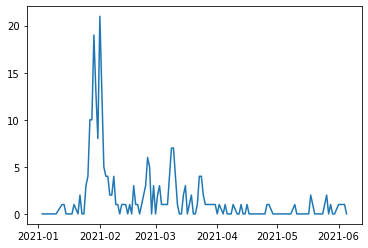

In [126]:
#.plot(rot=90).pd()
import matplotlib.pyplot as plt
plt.plot(wallstreetbets_mentions_plot[wallstreetbets_mentions_plot.index])
#.loc >= '2021-01-01'